## EarlyStopping을 이용해봄

In [1]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/wine.csv', header=None);
X = df.iloc[:, :12];
y = df.iloc[:, 12];
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, shuffle=True)

In [3]:
model = models.Sequential();
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # hidden layer가 2개 들어간 모델

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']);

early_stopping = EarlyStopping(monitor='val_loss', patience=20) # validation loss를 감시하다가 20번 연속적으로 좋아지지 않는다면 강제로 학습을 중지
model_path = "./model/best_model.hdf5"
chackpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=0, save_best_only=True) # validation loss를 감시하다가 좋아졌을때에만(loss값이 적어질때만) 저장

history = model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=1, validation_split=0.25, callbacks=[early_stopping, chackpoint]);

Epoch 1/2000


C:\Users\BIT\miniconda3\envs\ml-env\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 1s 47ms/step - loss: 2.3604 - accuracy: 0.2797 - val_loss: 0.6426 - val_accuracy: 0.7131
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.4559 - accuracy: 0.7801 - val_loss: 0.3748 - val_accuracy: 0.7623
Epoch 3/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.3762 - accuracy: 0.7583 - val_loss: 0.4030 - val_accuracy: 0.7531
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.3981 - accuracy: 0.7547 - val_loss: 0.4074 - val_accuracy: 0.7531
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.7575 - val_loss: 0.3826 - val_accuracy: 0.7669
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.3597 - accuracy: 0.7873 - val_loss: 0.3457 - val_accuracy: 0.8131
Epoch 7/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.3283 - accuracy: 0.8468 - val_loss: 0.3273 - val_accuracy: 0.8731
Epoch 8/2000
8/8 [============

8/8 [==============================] - 0s 14ms/step - loss: 0.1269 - accuracy: 0.9507 - val_loss: 0.1405 - val_accuracy: 0.9492
Epoch 60/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1263 - accuracy: 0.9500 - val_loss: 0.1398 - val_accuracy: 0.9515
Epoch 61/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1241 - accuracy: 0.9551 - val_loss: 0.1394 - val_accuracy: 0.9515
Epoch 62/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1253 - accuracy: 0.9523 - val_loss: 0.1503 - val_accuracy: 0.9585
Epoch 63/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1307 - accuracy: 0.9523 - val_loss: 0.1336 - val_accuracy: 0.9531
Epoch 64/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1214 - accuracy: 0.9528 - val_loss: 0.1366 - val_accuracy: 0.9515
Epoch 65/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1192 - accuracy: 0.9548 - val_loss: 0.1307 - val_accuracy: 0.9562
Epoch 66/2000
8/8 [====

Epoch 117/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0679 - accuracy: 0.9784 - val_loss: 0.0912 - val_accuracy: 0.9762
Epoch 118/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0685 - accuracy: 0.9764 - val_loss: 0.0923 - val_accuracy: 0.9777
Epoch 119/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0688 - accuracy: 0.9779 - val_loss: 0.0942 - val_accuracy: 0.9754
Epoch 120/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0667 - accuracy: 0.9787 - val_loss: 0.0948 - val_accuracy: 0.9754
Epoch 121/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0668 - accuracy: 0.9777 - val_loss: 0.0899 - val_accuracy: 0.9785
Epoch 122/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0655 - accuracy: 0.9795 - val_loss: 0.0892 - val_accuracy: 0.9769
Epoch 123/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0660 - accuracy: 0.9797 - val_loss: 0.0923 - val_accuracy: 0.9785
Epoc

8/8 [==============================] - 0s 5ms/step - loss: 0.0506 - accuracy: 0.9828 - val_loss: 0.0830 - val_accuracy: 0.9831
Epoch 175/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0509 - accuracy: 0.9818 - val_loss: 0.0830 - val_accuracy: 0.9831
Epoch 176/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0509 - accuracy: 0.9831 - val_loss: 0.0826 - val_accuracy: 0.9831
Epoch 177/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0510 - accuracy: 0.9836 - val_loss: 0.0906 - val_accuracy: 0.9785
Epoch 178/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.9813 - val_loss: 0.0932 - val_accuracy: 0.9769
Epoch 179/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0541 - accuracy: 0.9820 - val_loss: 0.0893 - val_accuracy: 0.9792
Epoch 180/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0522 - accuracy: 0.9831 - val_loss: 0.0825 - val_accuracy: 0.9838
Epoch 181/2000
8/8 [

In [6]:
hist = pd.DataFrame(history.history)
hist.head()

,loss,accuracy,val_loss,val_accuracy
0,2.360402,0.279702,0.642590,0.713077
1,0.455876,0.780087,0.374793,0.762308
2,0.376200,0.758276,0.403017,0.753077
3,0.398086,0.754683,0.407364,0.753077
4,0.389034,0.757506,0.382643,0.766923


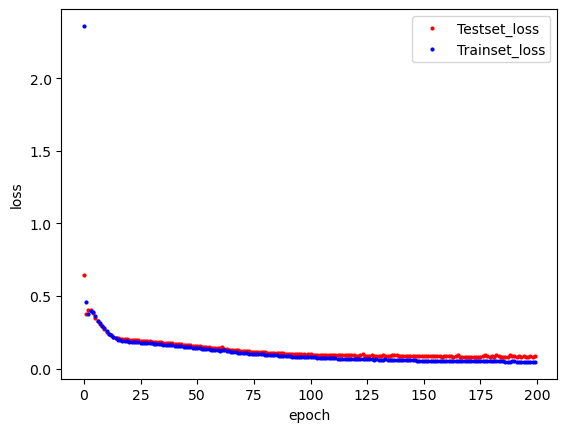

In [7]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss = hist['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()